In [1]:
    import numpy as np
    import pandas as pd

    # Creating DataFrame
    farm = pd.DataFrame()
    farm['Price'] = [632541, 425618, 356471, 7412512]
    farm['Rooms'] = [2, 5, 3, 100]
    farm['Square_Feet'] = [1600, 2850, 1780, 90000]
   # farm['category']=[1,2,1,2]
    print(farm)

   

     Price  Rooms  Square_Feet
0   632541      2         1600
1   425618      5         2850
2   356471      3         1780
3  7412512    100        90000


In [22]:
farm.describe()

,Price,Rooms,Square_Feet,category
count,4.000000e+00,4.000000,4.00000,4.00000
mean,2.206786e+06,27.500000,24057.50000,1.50000
std,3.472466e+06,48.349423,43965.12889,0.57735
min,3.564710e+05,2.000000,1600.00000,1.00000
25%,4.083312e+05,2.750000,1735.00000,1.00000
50%,5.290795e+05,4.000000,2315.00000,1.50000
75%,2.327534e+06,28.750000,24637.50000,2.00000
max,7.412512e+06,100.000000,90000.00000,2.00000


In [2]:
 # Outlier Handling Option 1: Drop
    # Droping observations greater than some value
 h = farm[farm['Rooms'] < 20]
 print(); print(h)

    


    Price  Rooms  Square_Feet
0  632541      2         1600
1  425618      5         2850
2  356471      3         1780


In [4]:
    # Outlier Handling Option 2: Mark
    # Creating feature based on boolean condition
    farm['Outlier'] = np.where(farm['Rooms'] < 20, 0, 1)

    # Show data
    print(); print(farm)

   


     Price  Rooms  Square_Feet  Outlier
0   632541      2         1600        0
1   425618      5         2850        0
2   356471      3         1780        0
3  7412512    100        90000        1


In [5]:
    # Outlier Handling Option 3: Rescale
    # Log feature
    farm['Log_Of_Square_Feet'] = [np.log(x) for x in farm['Square_Feet']]

    # Show data

In [6]:
print();print(farm)


     Price  Rooms  Square_Feet  Outlier  Log_Of_Square_Feet
0   632541      2         1600        0            7.377759
1   425618      5         2850        0            7.955074
2   356471      3         1780        0            7.484369
3  7412512    100        90000        1           11.407565


In [7]:
    df = pd.DataFrame()
    df['Price'] = [632541, 425618, 356471, 7412512]
    df['Rooms'] = [2, 5, 3, 100]
    df['Square_Feet'] = [1600, 2850, 1780, 90000]
    print(); print(df)


     Price  Rooms  Square_Feet
0   632541      2         1600
1   425618      5         2850
2   356471      3         1780
3  7412512    100        90000


In [11]:
df.describe()

,Price,Rooms,Square_Feet
count,4.000000e+00,4.000000,4.00000
mean,2.206786e+06,27.500000,24057.50000
std,3.472466e+06,48.349423,43965.12889
min,3.564710e+05,2.000000,1600.00000
25%,4.083312e+05,2.750000,1735.00000
50%,5.290795e+05,4.000000,2315.00000
75%,2.327534e+06,28.750000,24637.50000
max,7.412512e+06,100.000000,90000.00000


In [6]:
import seaborn as sns

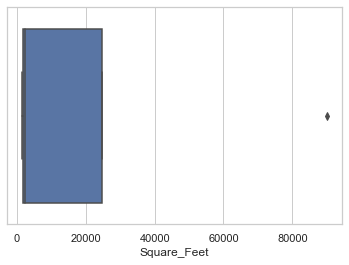

In [9]:
sns.set(style="whitegrid")
ax=sns.boxplot(x=df['Square_Feet'])

In [9]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR) 
print();print(Q1);print();print(Q3)

Price          1919202.5
Rooms               26.0
Square_Feet      22902.5
dtype: float64

Price          408331.25
Rooms               2.75
Square_Feet      1735.00
Name: 0.25, dtype: float64

Price          2327533.75
Rooms               28.75
Square_Feet      24637.50
Name: 0.75, dtype: float64


In [10]:
print(Q3+1.5*IQR)  # Q1-1.5*IQR

Price          5206337.50
Rooms               67.75
Square_Feet      58991.25
dtype: float64


In [12]:
def total_outliers(X,Y):
    c=0
    for i in X:
        if i>Y:
            c=c+1
            
    print(c)      

In [13]:
total_outliers(df.Rooms,67.75)

1


In [16]:
df[df.Rooms<67.75].shape[0]

3